In Homework 1, it's expected to pick 3 different categories of data from Central Bank of the Republic of Turkey. Also, bulding three different models for these data sets is required. These three sets are picked:
1) Unemployment rate in percentage (issizlik in Turkish) 
2) House's economic expectation for the next 12 months (hanenin maddi durum beklentisi in Turkish)
3) Entertainment and culture services (eglence ve kultur hizmetleri in Turkish)
A different model is created for each one with Google trends data sets.

In [1]:
df <- read.csv("EVDS.csv")
head(df)
tail(df)

,Tarih,issizlik,eglence.ve.kultur,maddi.beklenti
,<chr>,<dbl>,<dbl>,<dbl>
1,2014-01,10.5,234.57,91.27544
2,2014-02,10.5,233.76,88.78396
3,2014-03,9.4,235.12,91.39233
4,2014-04,8.8,238.56,94.88917
5,2014-05,8.4,237.63,93.14925
6,2014-06,9.0,238.00,90.92231


,Tarih,issizlik,eglence.ve.kultur,maddi.beklenti
,<chr>,<dbl>,<dbl>,<dbl>
116,2023-08,9.2,1098.96,63.69000
117,2023-09,8.9,1152.61,68.88000
118,2023-10,8.2,1215.88,72.62000
119,2023-11,8.8,1239.42,74.52000
120,2023-12,8.9,1304.60,76.09000
121,2024-01,9.8,1471.69,79.47608


In [2]:
summary(df)
str(df)

    Tarih              issizlik     eglence.ve.kultur maddi.beklenti 
 Length:121         Min.   : 8.20   Min.   : 233.8    Min.   :59.87  
 Class :character   1st Qu.:10.00   1st Qu.: 285.6    1st Qu.:76.97  
 Mode  :character   Median :10.70   Median : 347.4    Median :84.19  
                    Mean   :11.16   Mean   : 433.5    Mean   :82.58  
                    3rd Qu.:12.50   3rd Qu.: 451.3    3rd Qu.:89.76  
                    Max.   :15.10   Max.   :1471.7    Max.   :95.66  

'data.frame':	121 obs. of  4 variables:
 $ Tarih            : chr  "2014-01" "2014-02" "2014-03" "2014-04" ...
 $ issizlik         : num  10.5 10.5 9.4 8.8 8.4 9 9.7 10.1 10.1 10.9 ...
 $ eglence.ve.kultur: num  235 234 235 239 238 ...
 $ maddi.beklenti   : num  91.3 88.8 91.4 94.9 93.1 ...


In [ ]:
library(ggplot2)
library(ggthemes)
library(corrgram)
library(corrplot)
library(GGally)
library(forecast)

                    issizlik eglence.ve.kultur maddi.beklenti
issizlik           1.0000000        -0.2992054     -0.2395422
eglence.ve.kultur -0.2992054         1.0000000     -0.4824986
maddi.beklenti    -0.2395422        -0.4824986      1.0000000
$corr
                    issizlik eglence.ve.kultur maddi.beklenti
issizlik           1.0000000        -0.2992054     -0.2395422
eglence.ve.kultur -0.2992054         1.0000000     -0.4824986
maddi.beklenti    -0.2395422        -0.4824986      1.0000000

$corrPos
              xName             yName x y       corr
1          issizlik          issizlik 1 3  1.0000000
2          issizlik eglence.ve.kultur 1 2 -0.2992054
3          issizlik    maddi.beklenti 1 1 -0.2395422
4 eglence.ve.kultur          issizlik 2 3 -0.2992054
5 eglence.ve.kultur eglence.ve.kultur 2 2  1.0000000
6 eglence.ve.kultur    maddi.beklenti 2 1 -0.4824986
7    maddi.beklenti          issizlik 3 3 -0.2395422
8    maddi.beklenti eglence.ve.kultur 3 2 -0.4824986
9    maddi.

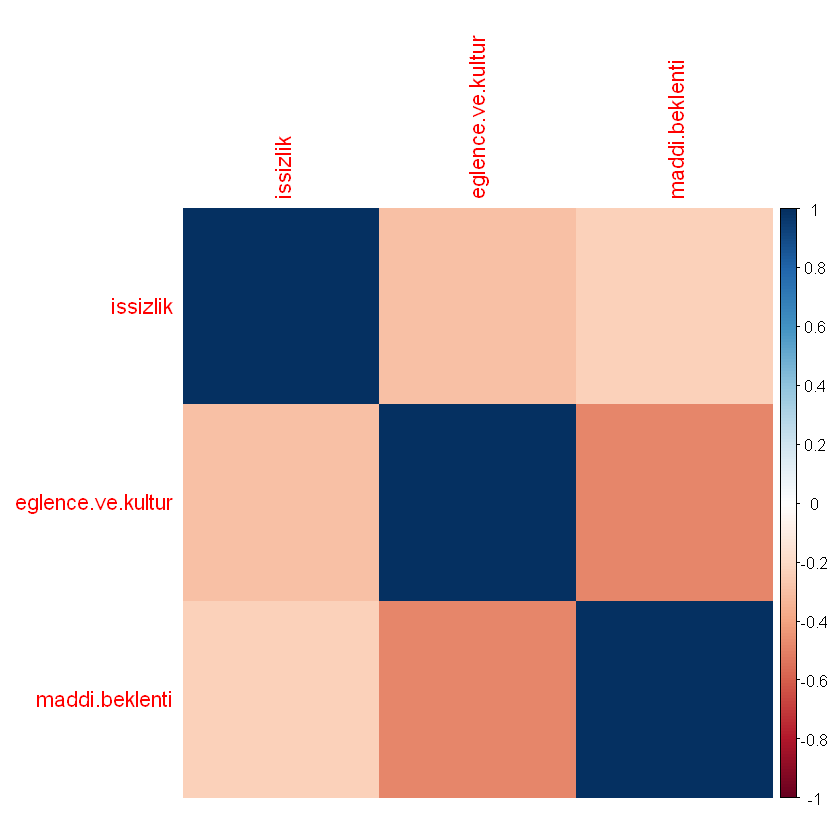

In [4]:
num.cols <- sapply(df, is.numeric)
cor.data <- cor(df[,num.cols]) #Calculate correlation between Bank data
print(cor.data)
print(corrplot(cor.data,method="color", tl.cex = 1.1, cl.cex=0.8))

Correlation between chosen data sets is lower than 0.5 as it was required.

1) Model of Unemployment rate. 
In today's world, people mostly look for a job in the Internet. Linkedin is one of the global websites which helps people to get a job in different ways. Also, iskur has such a property in Turkey. It's an organization for such situations. Along with these two, "is ilanı (job ads in English)" can be a critical key word while looking for a job. Thus, the first model looks for is there a relationship between unemployment rate and Linkedin, Iskur, and job ads?

In [5]:
# All trends data will be used following models. It'll be explained part by part, but for now, let's see all data sets together

df2 <- read.csv("trends_last_new.csv")
head(df2)
tail(df2)

,Month,sayisal.loto,iddaa,at.yarisi,tiyatro,sinema,konser,linkedin,iskur,is.ilani
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2014-01,82,72,41,60,63,10,54,37,40
2,2014-02,89,100,44,61,84,13,55,38,44
3,2014-03,79,94,42,61,59,13,54,35,37
4,2014-04,76,94,41,62,50,14,55,36,39
5,2014-05,76,68,36,50,36,16,55,35,37
6,2014-06,74,42,40,27,37,12,54,33,43


,Month,sayisal.loto,iddaa,at.yarisi,tiyatro,sinema,konser,linkedin,iskur,is.ilani
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
116,2023-08,36,17,70,42,31,100,85,35,52
117,2023-09,33,20,72,51,26,81,85,32,50
118,2023-10,36,24,79,64,29,76,79,24,45
119,2023-11,32,22,75,74,46,38,77,28,44
120,2023-12,33,23,75,71,48,36,75,24,40
121,2024-01,31,19,64,75,73,30,81,23,45


In [6]:
summary(df2)
str(df2)

    Month            sayisal.loto        iddaa          at.yarisi     
 Length:121         Min.   : 31.00   Min.   :  5.00   Min.   : 12.00  
 Class :character   1st Qu.: 44.00   1st Qu.: 22.00   1st Qu.: 54.00  
 Mode  :character   Median : 54.00   Median : 35.00   Median : 69.00  
                    Mean   : 57.13   Mean   : 45.17   Mean   : 64.25  
                    3rd Qu.: 70.00   3rd Qu.: 68.00   3rd Qu.: 75.00  
                    Max.   :100.00   Max.   :100.00   Max.   :100.00  
    tiyatro           sinema           konser          linkedin     
 Min.   : 19.00   Min.   :  6.00   Min.   :  4.00   Min.   : 45.00  
 1st Qu.: 34.00   1st Qu.: 29.00   1st Qu.: 12.00   1st Qu.: 53.00  
 Median : 56.00   Median : 42.00   Median : 18.00   Median : 59.00  
 Mean   : 53.26   Mean   : 44.39   Mean   : 26.41   Mean   : 63.59  
 3rd Qu.: 73.00   3rd Qu.: 62.00   3rd Qu.: 33.00   3rd Qu.: 68.00  
 Max.   :100.00   Max.   :100.00   Max.   :100.00   Max.   :100.00  
     iskur          

'data.frame':	121 obs. of  10 variables:
 $ Month       : chr  "2014-01" "2014-02" "2014-03" "2014-04" ...
 $ sayisal.loto: int  82 89 79 76 76 74 69 100 90 72 ...
 $ iddaa       : int  72 100 94 94 68 42 38 54 72 89 ...
 $ at.yarisi   : int  41 44 42 41 36 40 41 40 39 39 ...
 $ tiyatro     : int  60 61 61 62 50 27 19 21 29 46 ...
 $ sinema      : int  63 84 59 50 36 37 35 36 35 54 ...
 $ konser      : int  10 13 13 14 16 12 12 14 17 13 ...
 $ linkedin    : int  54 55 54 55 55 54 60 59 65 62 ...
 $ iskur       : int  37 38 35 36 35 33 34 35 43 38 ...
 $ is.ilani    : int  40 44 37 39 37 43 46 59 54 46 ...


In [7]:
# Because Google Trends data sets are between 0 and 100, let's normalize bank nata
df$issizlik <- 100*((df$issizlik -min(df$issizlik))/(max(df$issizlik)-min(df$issizlik))) #unemployed
df$maddi.beklenti <- 100*((df$maddi.beklenti-min(df$maddi.beklenti))/(max(df$maddi.beklenti)-min(df$maddi.beklenti))) #financial situation expectation
df$eglence.ve.kultur <- 100*((df$eglence.ve.kultur-min(df$eglence.ve.kultur))/(max(df$eglence.ve.kultur)-min(df$eglence.ve.kultur))) #art and fun
head(df)
tail(df)

,Tarih,issizlik,eglence.ve.kultur,maddi.beklenti
,<chr>,<dbl>,<dbl>,<dbl>
1,2014-01,33.333333,0.06543181,87.74275
2,2014-02,33.333333,0.00000000,80.78188
3,2014-03,17.391304,0.10986082,88.06934
4,2014-04,8.695652,0.38774406,97.83905
5,2014-05,2.898551,0.31261865,92.97794
6,2014-06,11.594203,0.34250725,86.75617


,Tarih,issizlik,eglence.ve.kultur,maddi.beklenti
,<chr>,<dbl>,<dbl>,<dbl>
116,2023-08,14.492754,69.89087,10.67259
117,2023-09,10.144928,74.22471,25.17278
118,2023-10,0.000000,79.33567,35.62186
119,2023-11,8.695652,81.23723,40.93021
120,2023-12,10.144928,86.50247,45.31659
121,2024-01,23.188406,100.00000,54.77686


In [8]:
df$linkedin <- df2$linkedin
df$iskur <- df2$iskur
df$is.ilani <- df2$is.ilani
df$sinema <- df2$sinema
df$tiyatro <- df2$tiyatro
df$konser <- df2$konser
df$iddaa <- df2$iddaa
df$sayisal.loto <- df2$sayisal.loto
df$at.yarisi <- df2$at.yarisi
head(df)
summary(df)
str(df)

,Tarih,issizlik,eglence.ve.kultur,maddi.beklenti,linkedin,iskur,is.ilani,sinema,tiyatro,konser,iddaa,sayisal.loto,at.yarisi
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2014-01,33.333333,0.06543181,87.74275,54,37,40,63,60,10,72,82,41
2,2014-02,33.333333,0.00000000,80.78188,55,38,44,84,61,13,100,89,44
3,2014-03,17.391304,0.10986082,88.06934,54,35,37,59,61,13,94,79,42
4,2014-04,8.695652,0.38774406,97.83905,55,36,39,50,62,14,94,76,41
5,2014-05,2.898551,0.31261865,92.97794,55,35,37,36,50,16,68,76,36
6,2014-06,11.594203,0.34250725,86.75617,54,33,43,37,27,12,42,74,40


    Tarih              issizlik      eglence.ve.kultur maddi.beklenti  
 Length:121         Min.   :  0.00   Min.   :  0.000   Min.   :  0.00  
 Class :character   1st Qu.: 26.09   1st Qu.:  4.188   1st Qu.: 47.78  
 Mode  :character   Median : 36.23   Median :  9.180   Median : 67.95  
                    Mean   : 42.93   Mean   : 16.135   Mean   : 63.44  
                    3rd Qu.: 62.32   3rd Qu.: 17.575   3rd Qu.: 83.51  
                    Max.   :100.00   Max.   :100.000   Max.   :100.00  
    linkedin          iskur           is.ilani          sinema      
 Min.   : 45.00   Min.   : 23.00   Min.   : 29.00   Min.   :  6.00  
 1st Qu.: 53.00   1st Qu.: 33.00   1st Qu.: 44.00   1st Qu.: 29.00  
 Median : 59.00   Median : 37.00   Median : 51.00   Median : 42.00  
 Mean   : 63.59   Mean   : 42.26   Mean   : 53.55   Mean   : 44.39  
 3rd Qu.: 68.00   3rd Qu.: 46.00   3rd Qu.: 61.00   3rd Qu.: 62.00  
 Max.   :100.00   Max.   :100.00   Max.   :100.00   Max.   :100.00  
    tiyatro  

'data.frame':	121 obs. of  13 variables:
 $ Tarih            : chr  "2014-01" "2014-02" "2014-03" "2014-04" ...
 $ issizlik         : num  33.3 33.3 17.4 8.7 2.9 ...
 $ eglence.ve.kultur: num  0.0654 0 0.1099 0.3877 0.3126 ...
 $ maddi.beklenti   : num  87.7 80.8 88.1 97.8 93 ...
 $ linkedin         : int  54 55 54 55 55 54 60 59 65 62 ...
 $ iskur            : int  37 38 35 36 35 33 34 35 43 38 ...
 $ is.ilani         : int  40 44 37 39 37 43 46 59 54 46 ...
 $ sinema           : int  63 84 59 50 36 37 35 36 35 54 ...
 $ tiyatro          : int  60 61 61 62 50 27 19 21 29 46 ...
 $ konser           : int  10 13 13 14 16 12 12 14 17 13 ...
 $ iddaa            : int  72 100 94 94 68 42 38 54 72 89 ...
 $ sayisal.loto     : int  82 89 79 76 76 74 69 100 90 72 ...
 $ at.yarisi        : int  41 44 42 41 36 40 41 40 39 39 ...


                     issizlik eglence.ve.kultur maddi.beklenti    linkedin
issizlik           1.00000000       -0.29920545   -0.239542221 -0.26067601
eglence.ve.kultur -0.29920545        1.00000000   -0.482498576  0.69658789
maddi.beklenti    -0.23954222       -0.48249858    1.000000000 -0.59841221
linkedin          -0.26067601        0.69658789   -0.598412207  1.00000000
iskur              0.52359116       -0.08425692   -0.372488701  0.09368982
is.ilani           0.54094786       -0.28464404   -0.006400942 -0.35422807
sinema             0.02275221       -0.20977241    0.250093591 -0.30142672
tiyatro            0.03097244        0.13374607   -0.148760364  0.10745939
konser            -0.25049621        0.59879488   -0.597758636  0.67187234
iddaa             -0.14012619       -0.57600031    0.628646176 -0.55521994
sayisal.loto       0.28820864       -0.61023258    0.276130109 -0.40347204
at.yarisi          0.35318523        0.29940717   -0.464101203  0.21011955
                        i

$corr
                     issizlik eglence.ve.kultur maddi.beklenti    linkedin
issizlik           1.00000000       -0.29920545   -0.239542221 -0.26067601
eglence.ve.kultur -0.29920545        1.00000000   -0.482498576  0.69658789
maddi.beklenti    -0.23954222       -0.48249858    1.000000000 -0.59841221
linkedin          -0.26067601        0.69658789   -0.598412207  1.00000000
iskur              0.52359116       -0.08425692   -0.372488701  0.09368982
is.ilani           0.54094786       -0.28464404   -0.006400942 -0.35422807
sinema             0.02275221       -0.20977241    0.250093591 -0.30142672
tiyatro            0.03097244        0.13374607   -0.148760364  0.10745939
konser            -0.25049621        0.59879488   -0.597758636  0.67187234
iddaa             -0.14012619       -0.57600031    0.628646176 -0.55521994
sayisal.loto       0.28820864       -0.61023258    0.276130109 -0.40347204
at.yarisi          0.35318523        0.29940717   -0.464101203  0.21011955
                   

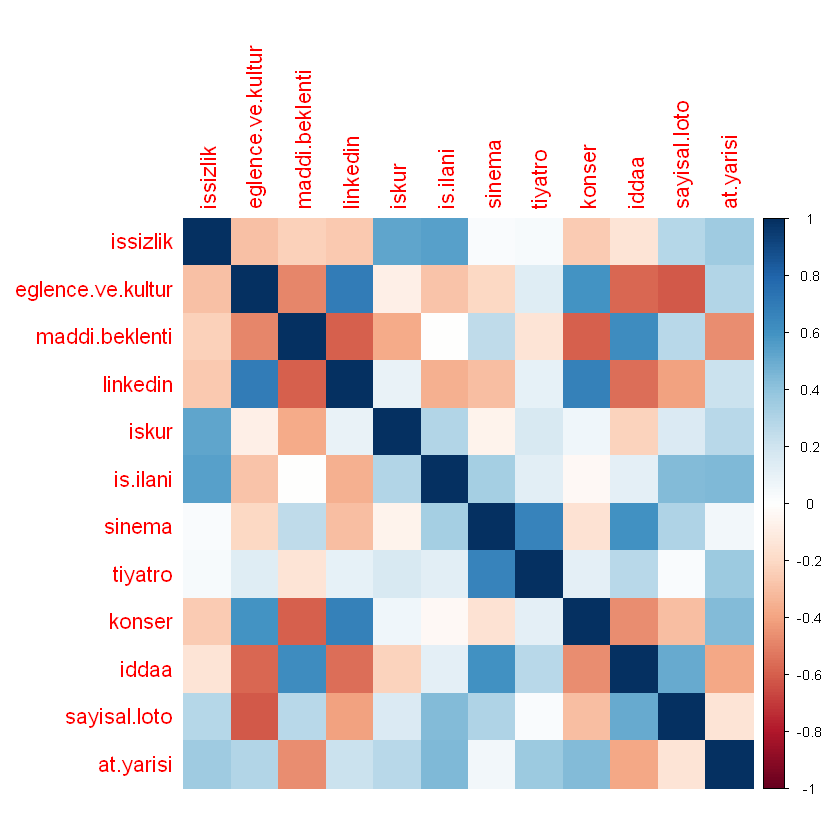

In [9]:
num.cols2 <- sapply(df, is.numeric)
cor.data2 <- cor(df[,num.cols2]) #Calculate correlation
print(cor.data2)
print(corrplot(cor.data2,method="color", tl.cex = 1.1, cl.cex=0.7))

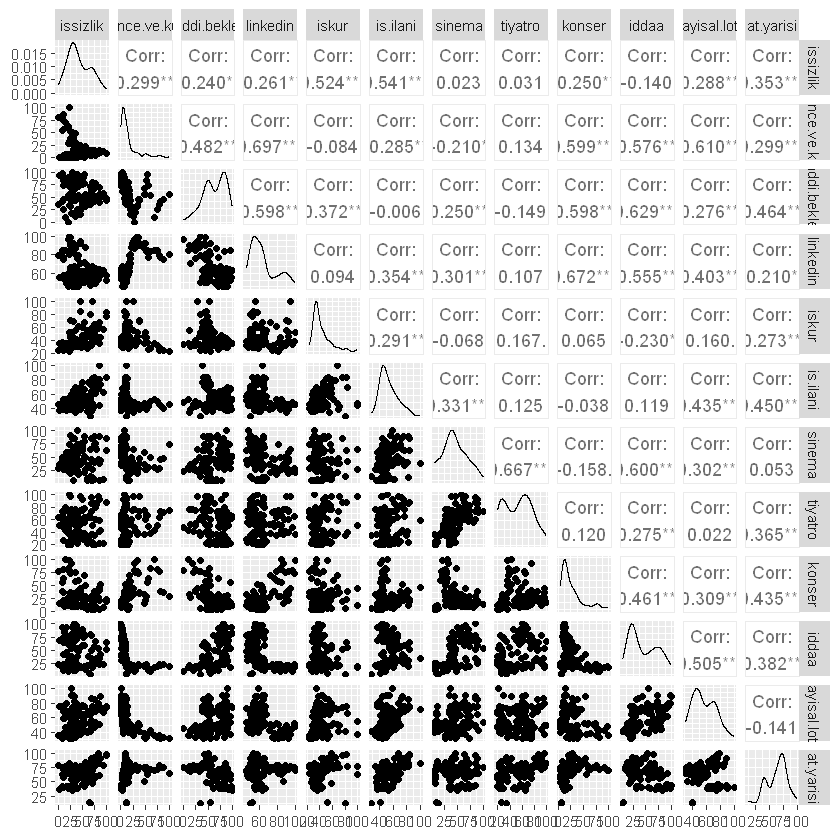

In [10]:
ggpairs(df, cardinality_threshold = NULL, columns = 2:13)

In [21]:
#The first model
model_is <- lm(issizlik ~ linkedin+iskur+is.ilani, data=df)
summary(model_is)


Call:
lm(formula = issizlik ~ linkedin + iskur + is.ilani, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.248 -12.348  -2.896   9.095  53.128 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.1997    12.0286  -0.183   0.8552    
linkedin     -0.2888     0.1205  -2.397   0.0181 *  
iskur         0.7002     0.1158   6.048 1.81e-08 ***
is.ilani      0.6331     0.1394   4.542 1.36e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 17.26 on 117 degrees of freedom
Multiple R-squared:  0.4652,	Adjusted R-squared:  0.4515 
F-statistic: 33.93 on 3 and 117 DF,  p-value: 7.483e-16


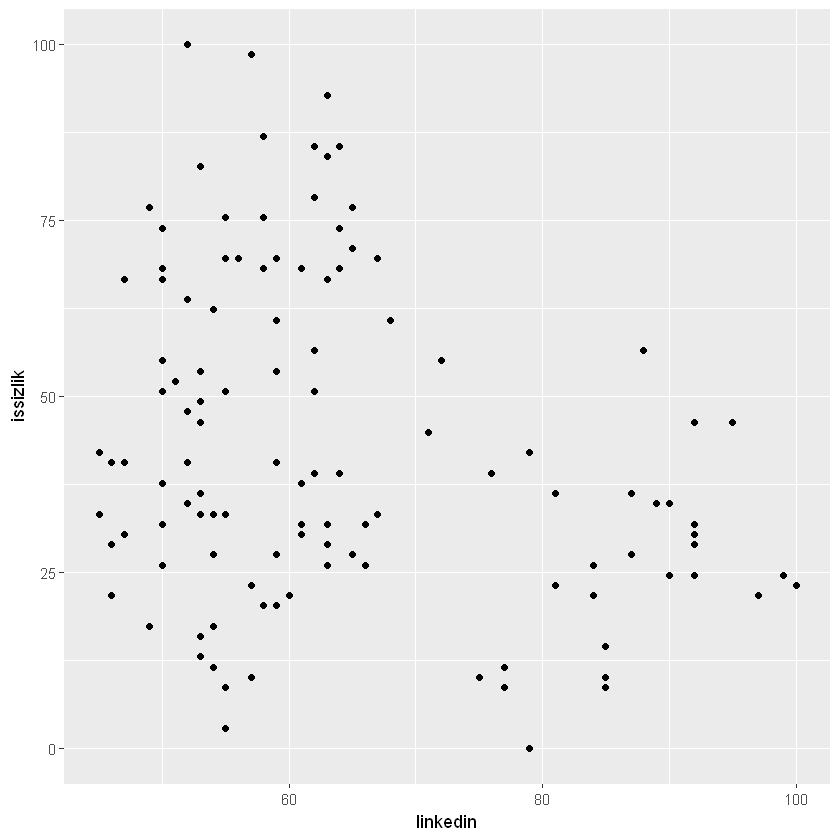

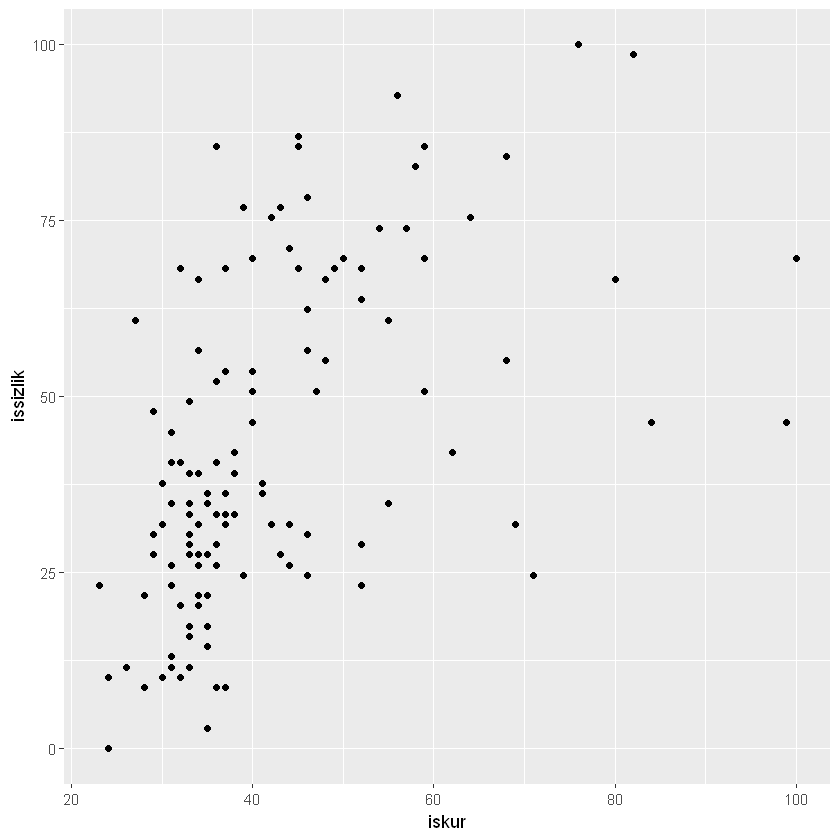

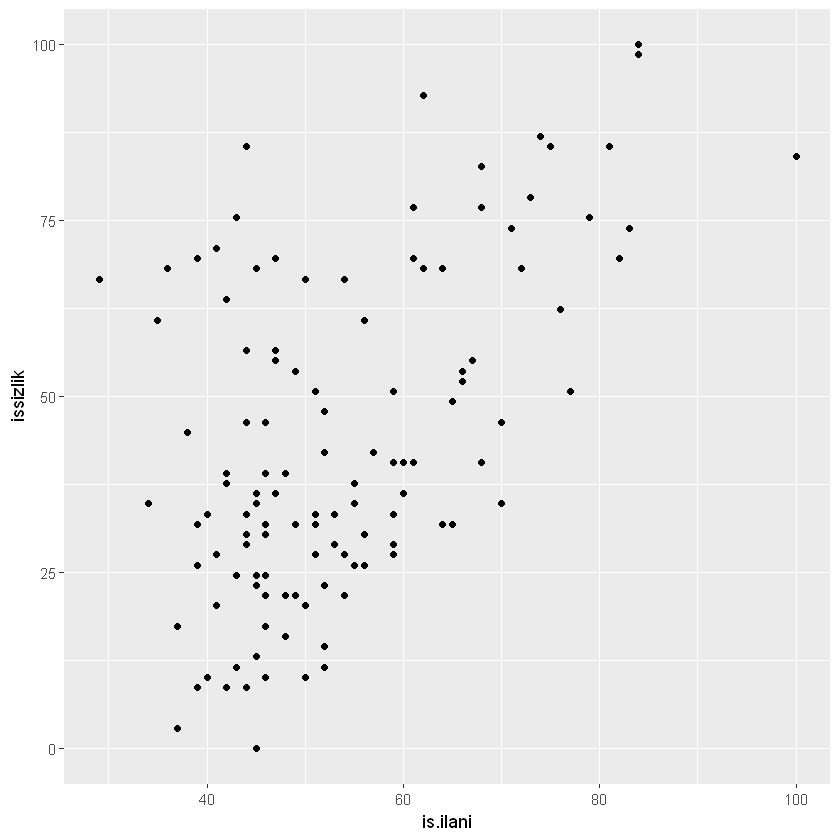

In [12]:
# Plot all pairs to see relations
ggplot(df, aes(x=linkedin,y=issizlik)) + geom_point()
ggplot(df, aes(x=iskur,y=issizlik)) + geom_point()
ggplot(df, aes(x=is.ilani,y=issizlik)) + geom_point()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


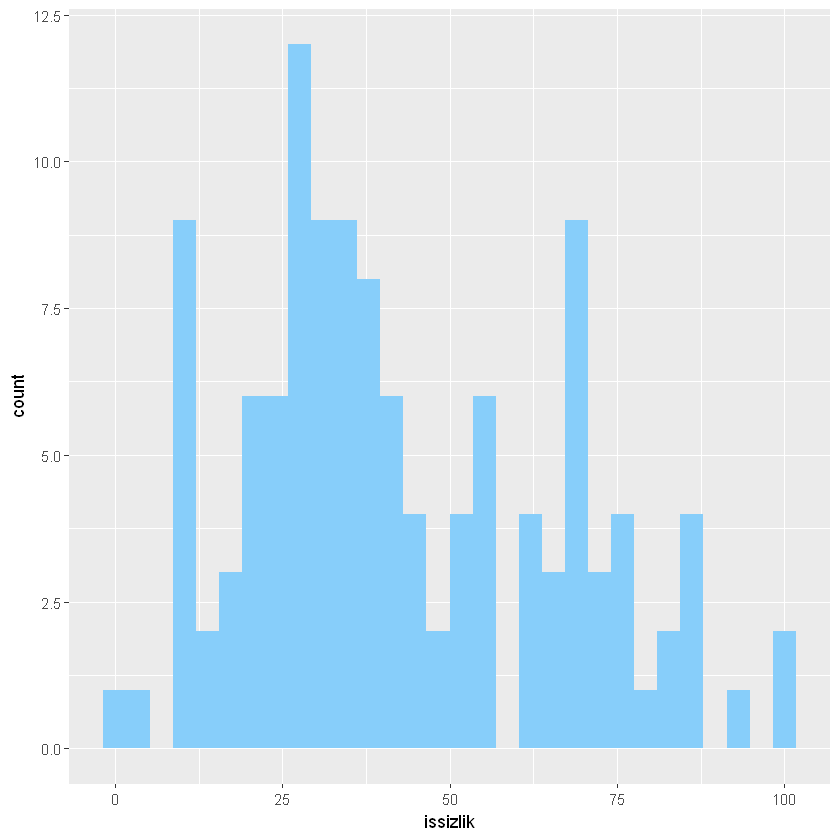

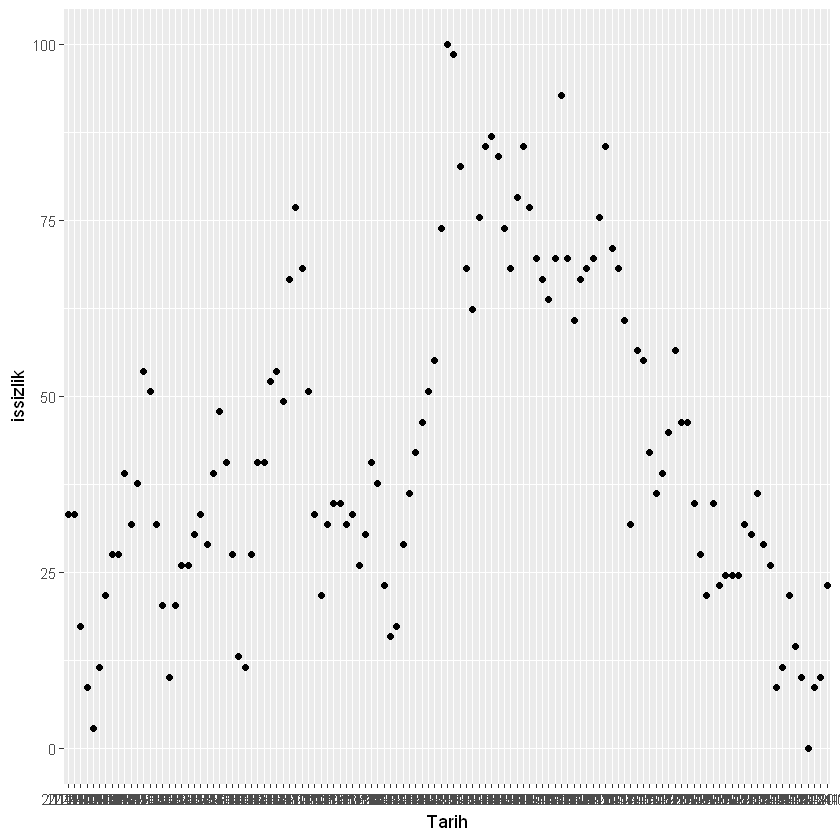

In [13]:
# Plot unemployment rate to see its condition
ggplot(df,aes(x=issizlik)) + geom_histogram(fill="#87CEFA")
ggplot(df, aes(x=Tarih, y=issizlik)) + geom_point()

Linkedin seems to have a nonlinear relationship. Firstly, try taking logarithm.

In [14]:
df_copy1 <- data.frame(df)
head(df_copy1)

,Tarih,issizlik,eglence.ve.kultur,maddi.beklenti,linkedin,iskur,is.ilani,sinema,tiyatro,konser,iddaa,sayisal.loto,at.yarisi
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2014-01,33.333333,0.06543181,87.74275,54,37,40,63,60,10,72,82,41
2,2014-02,33.333333,0.00000000,80.78188,55,38,44,84,61,13,100,89,44
3,2014-03,17.391304,0.10986082,88.06934,54,35,37,59,61,13,94,79,42
4,2014-04,8.695652,0.38774406,97.83905,55,36,39,50,62,14,94,76,41
5,2014-05,2.898551,0.31261865,92.97794,55,35,37,36,50,16,68,76,36
6,2014-06,11.594203,0.34250725,86.75617,54,33,43,37,27,12,42,74,40


In [15]:
df_copy1$link <- log(df_copy1$linkedin)
model_is_new <- lm(issizlik ~ linkedin+iskur+is.ilani+link, data=df_copy1)
summary(model_is_new)


Call:
lm(formula = issizlik ~ linkedin + iskur + is.ilani + link, data = df_copy1)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.762 -13.158  -0.539   9.618  48.616 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -594.4555   233.6278  -2.544  0.01226 *  
linkedin      -3.0145     1.0803  -2.790  0.00616 ** 
iskur          0.7156     0.1133   6.314 5.18e-09 ***
is.ilani       0.6055     0.1367   4.430 2.14e-05 ***
link         185.5966    73.1197   2.538  0.01247 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 16.87 on 116 degrees of freedom
Multiple R-squared:  0.4934,	Adjusted R-squared:  0.4759 
F-statistic: 28.24 on 4 and 116 DF,  p-value: < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals
LM test = 62.192, df = 10, p-value = 1.391e-09


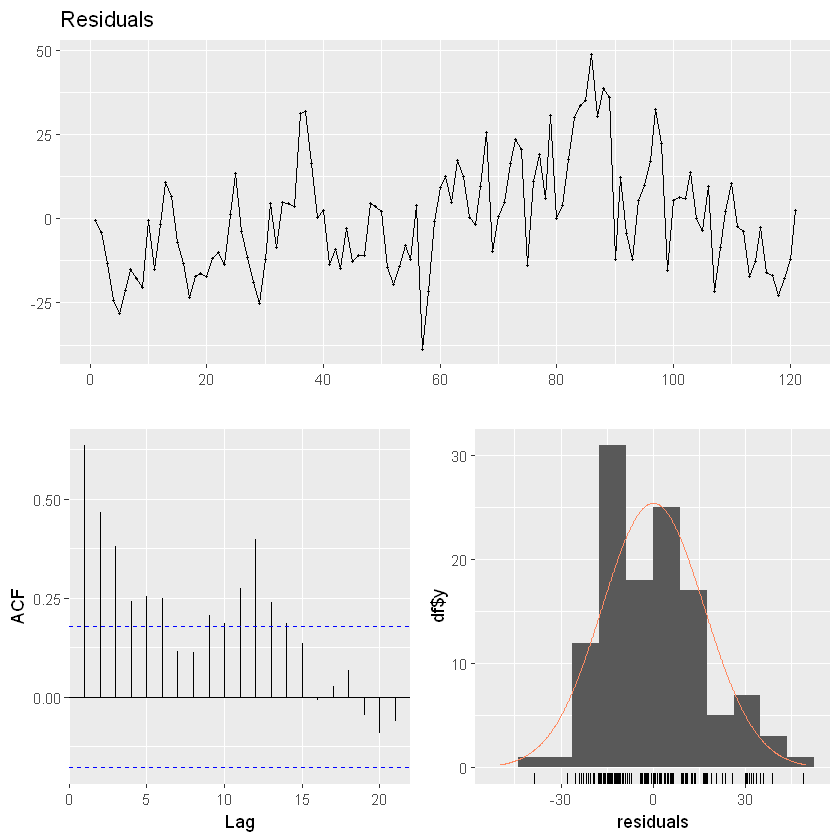

In [17]:
checkresiduals(model_is_new)

Adjusted R-squared increased by 0.02. It's not that much improvement. Also, there's high autocorrelation in the residuals which distorts the assumptions.
There's no additional clear nonlinear relationship between dependent variable and independent variables. Check autocorrelation in dependent variable.

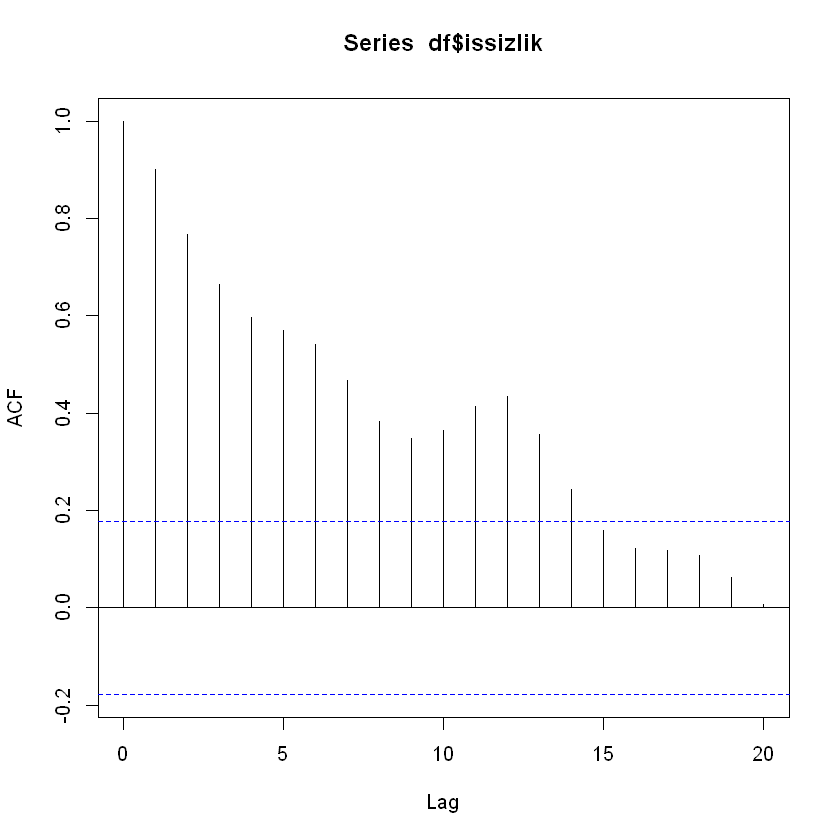

In [23]:
acf(df$issizlik)

Unemployment data seems autocorrelated. Let's take lag 1 to break this.

In [26]:
mean <- mean(df_copy1$issizlik)
dif <- c(mean, df_copy1$issizlik[1:120])
model_is_new1 <- lm(issizlik ~ linkedin+iskur+is.ilani+link+dif, data=df_copy1)
summary(model_is_new1)


Call:
lm(formula = issizlik ~ linkedin + iskur + is.ilani + link + 
    dif, data = df_copy1)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.5304  -6.6595  -0.3085   6.6138  24.6688 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -89.66926  136.70162  -0.656  0.51317    
linkedin     -0.48756    0.63515  -0.768  0.44428    
iskur         0.12370    0.07475   1.655  0.10069    
is.ilani      0.22055    0.08152   2.705  0.00786 ** 
link         27.24054   42.78985   0.637  0.52564    
dif           0.79073    0.05063  15.617  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.594 on 115 degrees of freedom
Multiple R-squared:  0.8377,	Adjusted R-squared:  0.8306 
F-statistic: 118.7 on 5 and 115 DF,  p-value: < 2.2e-16


The model improved a lot. Let's check whether assumptions hold in the residual side or not.


	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals
LM test = 28.551, df = 10, p-value = 0.001473


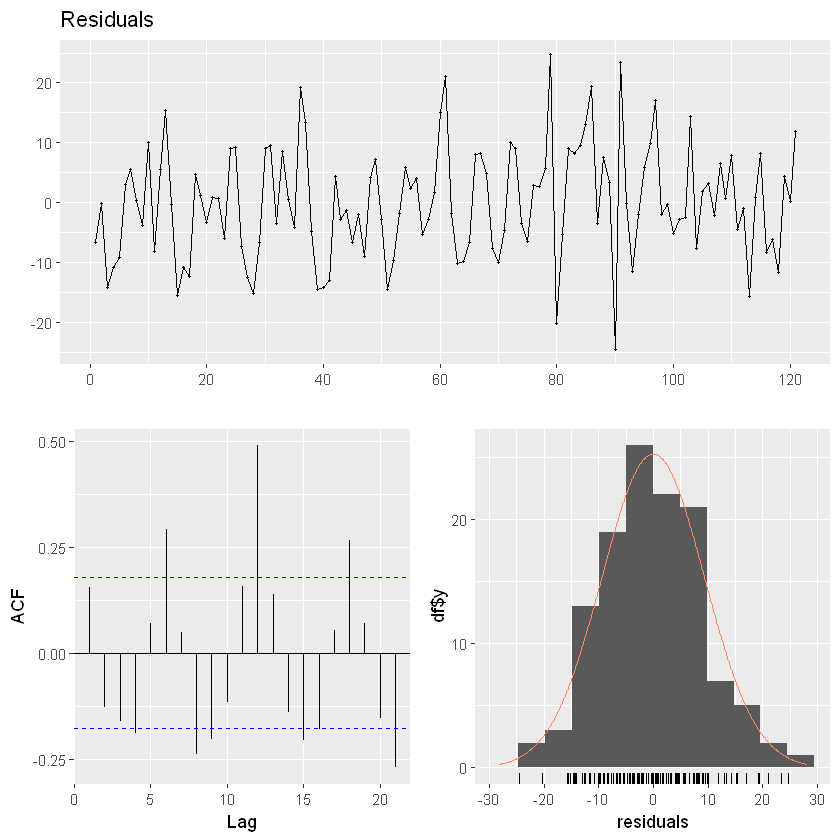

In [27]:
checkresiduals((model_is_new1))

At some points, residuals have correlation more than desired. However, most of them seem okay, below or near the level. Residuals seem to distribute normally, so that assumption holds, too.
Taking a lag 5 may decrease that autocorrelation, but because 5 terms are added to the model, I will not continue with this.

2) Advertisement and Culture Services
Going to cinema (sinema in Turkish), theatre (tiyatro), and concert(konser) are some fundamental fun activities. They are reachable for most of the population, so there may be a relation between them and advertisement and culture index. This model searches for whether there is a relation between advertisement-culture services (eglence.ve.kultur in the model) and cinema, theatre, concert or not.


Call:
lm(formula = eglence.ve.kultur ~ sinema + tiyatro + konser, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.307  -7.959  -2.554   2.517  84.825 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.83111    4.08110   0.694  0.48924    
sinema      -0.28489    0.08995  -3.167  0.00196 ** 
tiyatro      0.25274    0.08878   2.847  0.00522 ** 
konser       0.47286    0.06927   6.826 4.12e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.67 on 117 degrees of freedom
Multiple R-squared:  0.4128,	Adjusted R-squared:  0.3978 
F-statistic: 27.42 on 3 and 117 DF,  p-value: 1.68e-13



	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals
LM test = 103.62, df = 10, p-value < 2.2e-16


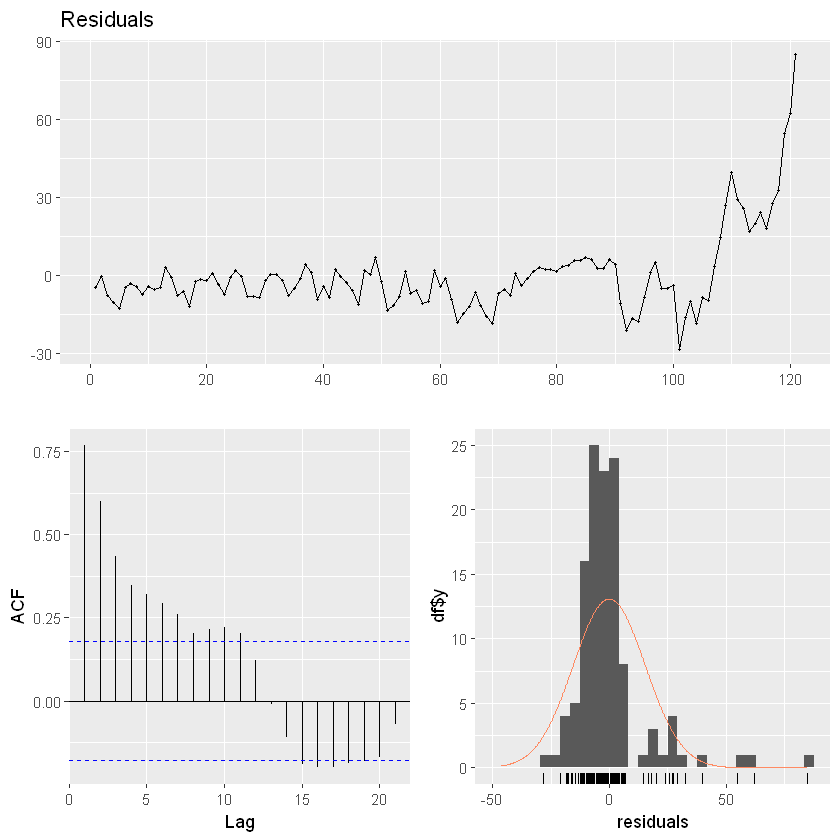

In [37]:
# The second model
model_eglence <- lm(eglence.ve.kultur ~ sinema+tiyatro+konser, data=df)
summary(model_eglence)
checkresiduals(model_eglence)

Adjusted R-square value is not that good. Check plot pairs to improve the model.

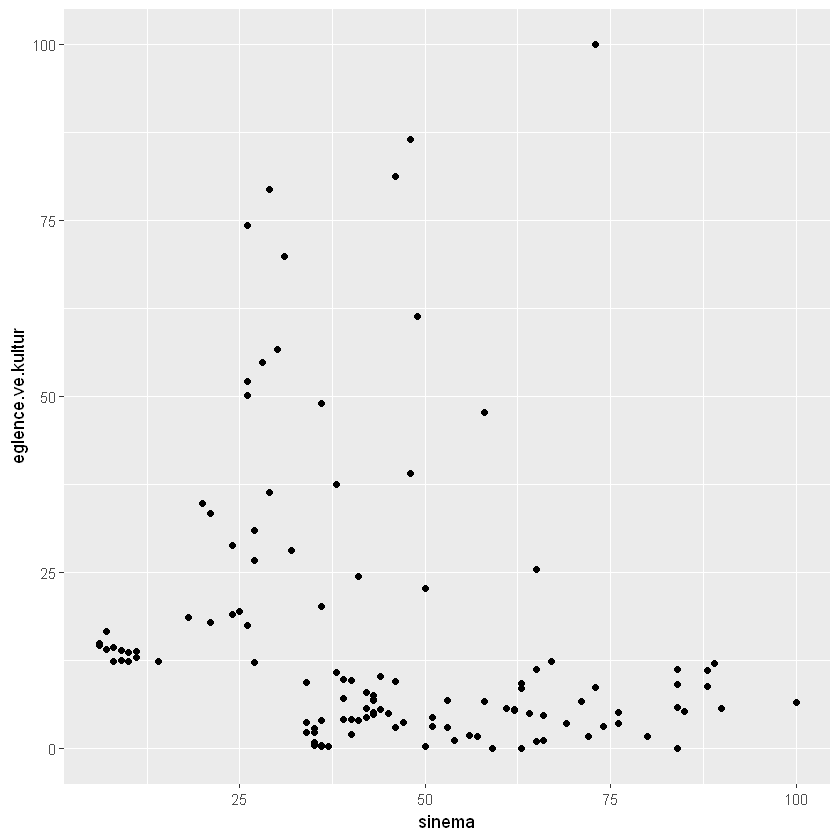

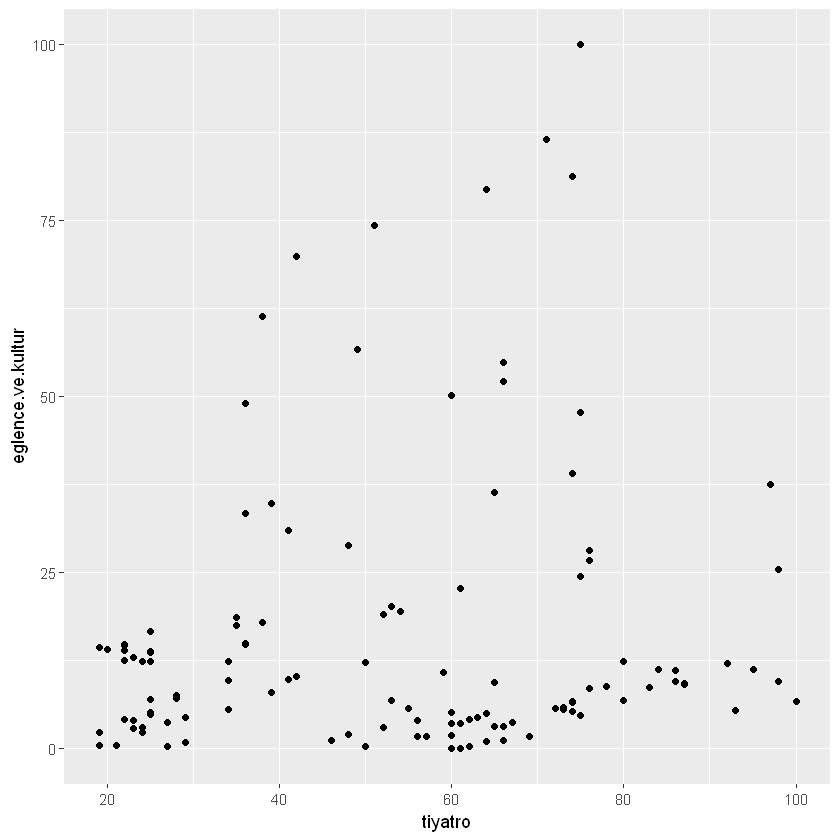

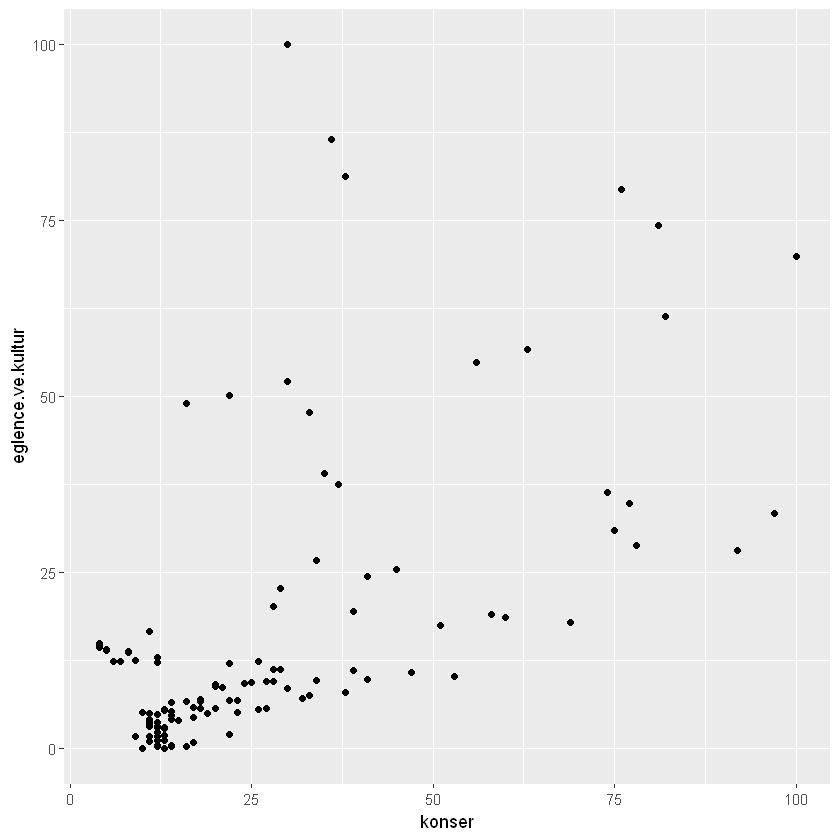

In [29]:
ggplot(df, aes(x=sinema,y=eglence.ve.kultur)) + geom_point()
ggplot(df, aes(x=tiyatro,y=eglence.ve.kultur)) + geom_point()
ggplot(df, aes(x=konser,y=eglence.ve.kultur)) + geom_point()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


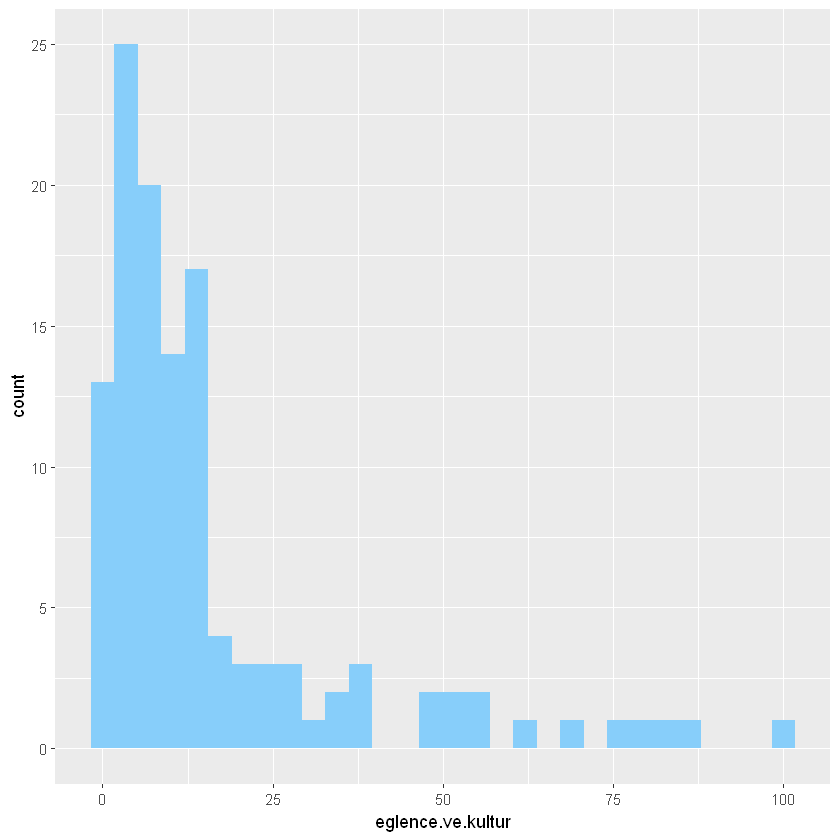

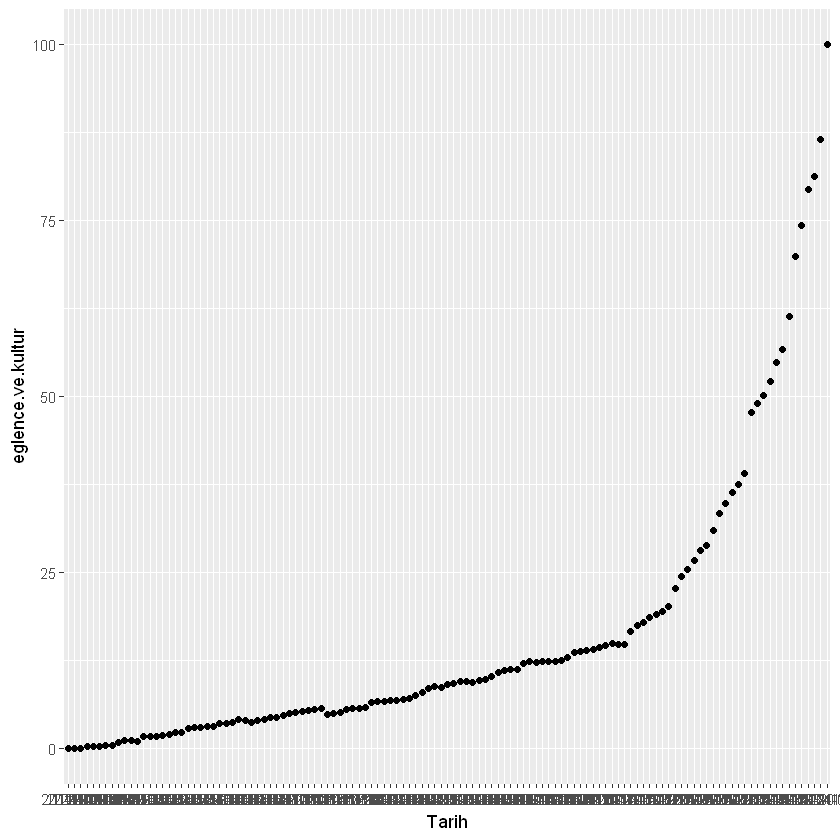

In [30]:
# To see dependent variable by itself
ggplot(df,aes(x=eglence.ve.kultur)) + geom_histogram(fill="#87CEFA")
ggplot(df, aes(x=Tarih, y=eglence.ve.kultur)) + geom_point()

Advertisement and culture index (eglence.ve.kultur) seems to distribute exponentially. Taking logarithm may help with this.

In [31]:
df_copy2 <- data.frame(df)


Call:
lm(formula = log(eglence.ve.kultur + 1) ~ sinema + tiyatro + 
    konser, data = df_copy2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.93625 -0.42677  0.05867  0.42986  2.53801 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.754198   0.191601   9.155 2.12e-15 ***
sinema      -0.026094   0.004223  -6.179 9.67e-09 ***
tiyatro      0.020532   0.004168   4.926 2.79e-06 ***
konser       0.022930   0.003252   7.050 1.34e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7355 on 117 degrees of freedom
Multiple R-squared:  0.5326,	Adjusted R-squared:  0.5206 
F-statistic: 44.44 on 3 and 117 DF,  p-value: < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals
LM test = 87.538, df = 10, p-value = 1.646e-14


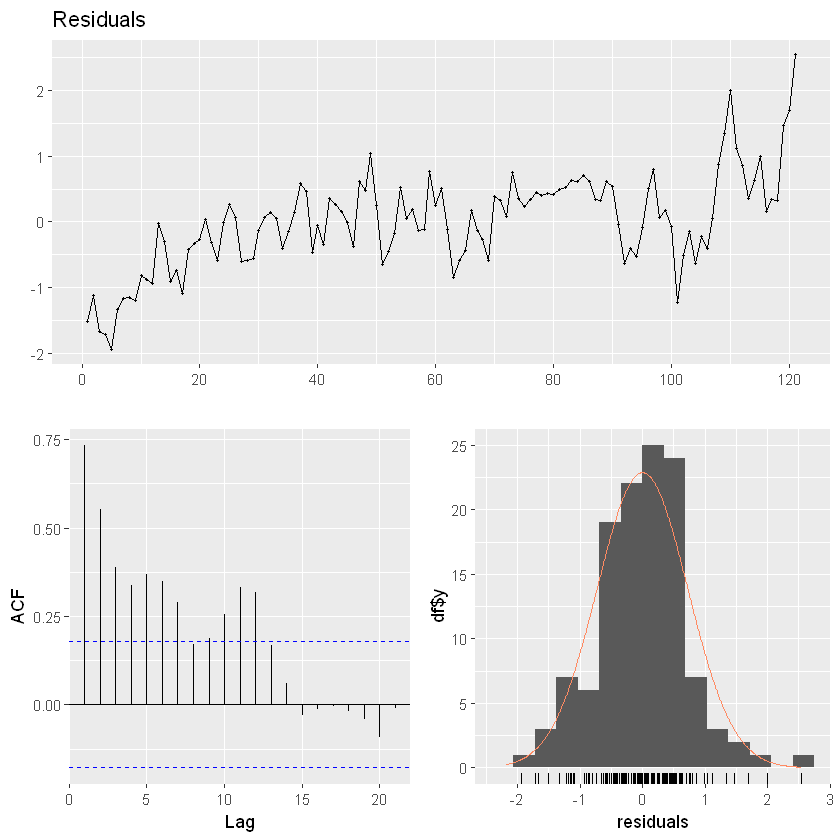

In [38]:
model_eglence_new <- lm(log(eglence.ve.kultur + 1)~ sinema+tiyatro+konser, data=df_copy2)
summary(model_eglence_new)
checkresiduals(model_eglence_new)

The adjusted R-squared value improved by nearly 0.14. In the plots, cinema seems to have a nonlinear relation with eglence.ve.kultur. Let's try logarithm with it too.


Call:
lm(formula = log(eglence.ve.kultur + 1) ~ sinema + tiyatro + 
    konser + lg_sinema, data = df_copy2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.63018 -0.35040  0.02903  0.29410  2.34981 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.305089   0.615765   6.991 1.85e-10 ***
sinema       0.007725   0.008748   0.883    0.379    
tiyatro      0.019560   0.003891   5.028 1.82e-06 ***
konser       0.028598   0.003302   8.662 3.17e-14 ***
lg_sinema   -1.148749   0.265386  -4.329 3.20e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6854 on 116 degrees of freedom
Multiple R-squared:  0.5976,	Adjusted R-squared:  0.5837 
F-statistic: 43.07 on 4 and 116 DF,  p-value: < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals
LM test = 85.293, df = 10, p-value = 4.569e-14


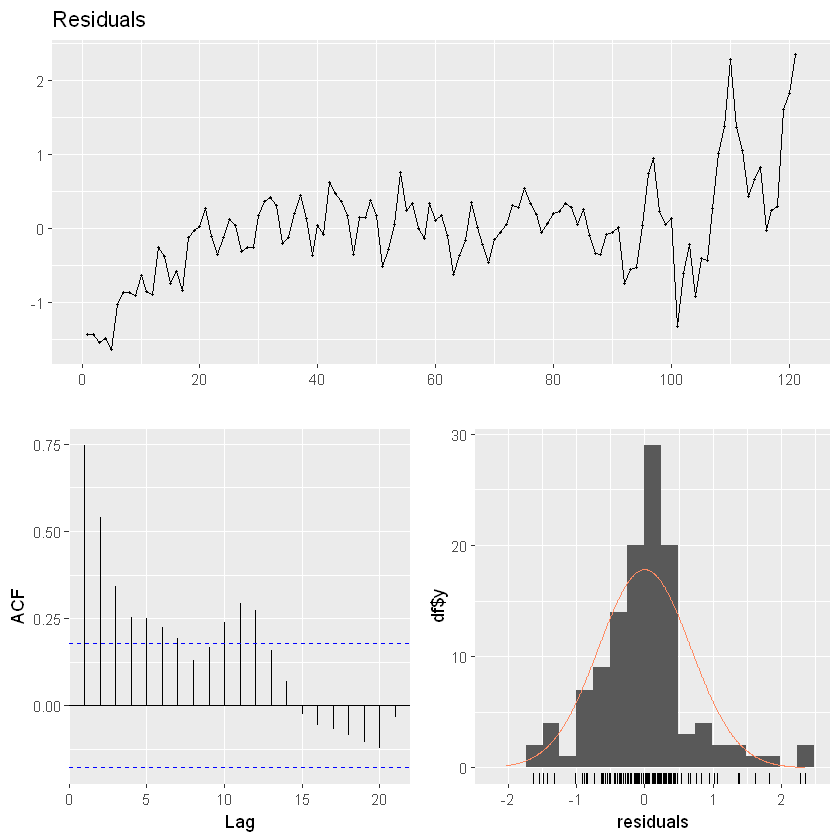

In [39]:
df_copy2$lg_sinema <- log(df_copy2$sinema)
model_eglence_new1 <- lm(log(eglence.ve.kultur + 1)~ sinema+tiyatro+konser+lg_sinema, data=df_copy2)
summary(model_eglence_new1)
checkresiduals(model_eglence_new1)

Adjusted R-squared improved a bit in this case, too. After taking the logarithm of a exponential distribution, it will look like a trend line. Therefore adding a trend can also improve this model.

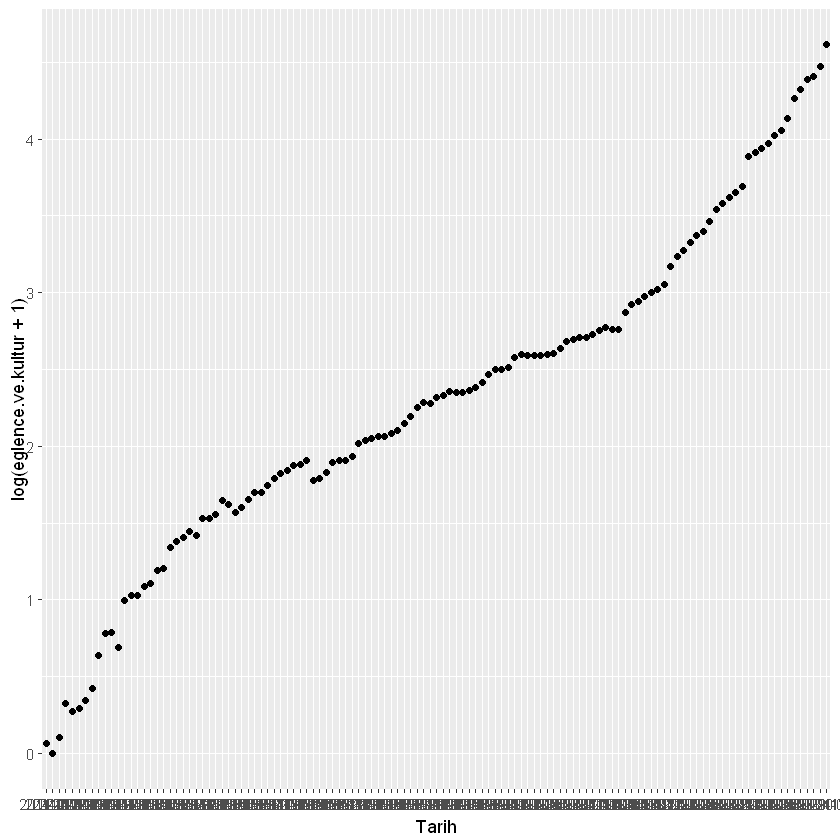

In [34]:
# To see the trend
ggplot(df, aes(x=Tarih, y=log(eglence.ve.kultur + 1))) + geom_point()

In [35]:
df_copy2$trend <- 1:121
model_eglence_new2 <- lm(log(eglence.ve.kultur + 1) ~ sinema+tiyatro+konser+lg_sinema+trend, data=df_copy2)
summary(model_eglence_new2)


Call:
lm(formula = log(eglence.ve.kultur + 1) ~ sinema + tiyatro + 
    konser + lg_sinema + trend, data = df_copy2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.51026 -0.08108 -0.00916  0.15557  0.39242 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.7603133  0.2150462  -3.536 0.000587 ***
sinema      -0.0055254  0.0024182  -2.285 0.024154 *  
tiyatro     -0.0018979  0.0012055  -1.574 0.118151    
konser      -0.0024008  0.0012186  -1.970 0.051231 .  
lg_sinema    0.4100012  0.0834403   4.914 2.99e-06 ***
trend        0.0325227  0.0008584  37.886  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1875 on 115 degrees of freedom
Multiple R-squared:  0.9702,	Adjusted R-squared:  0.9689 
F-statistic: 747.6 on 5 and 115 DF,  p-value: < 2.2e-16


Adjusted R-squared improved a lot. Let's check residuals to see whether the assumptions hold or not.


	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals
LM test = 96.532, df = 10, p-value = 2.688e-16


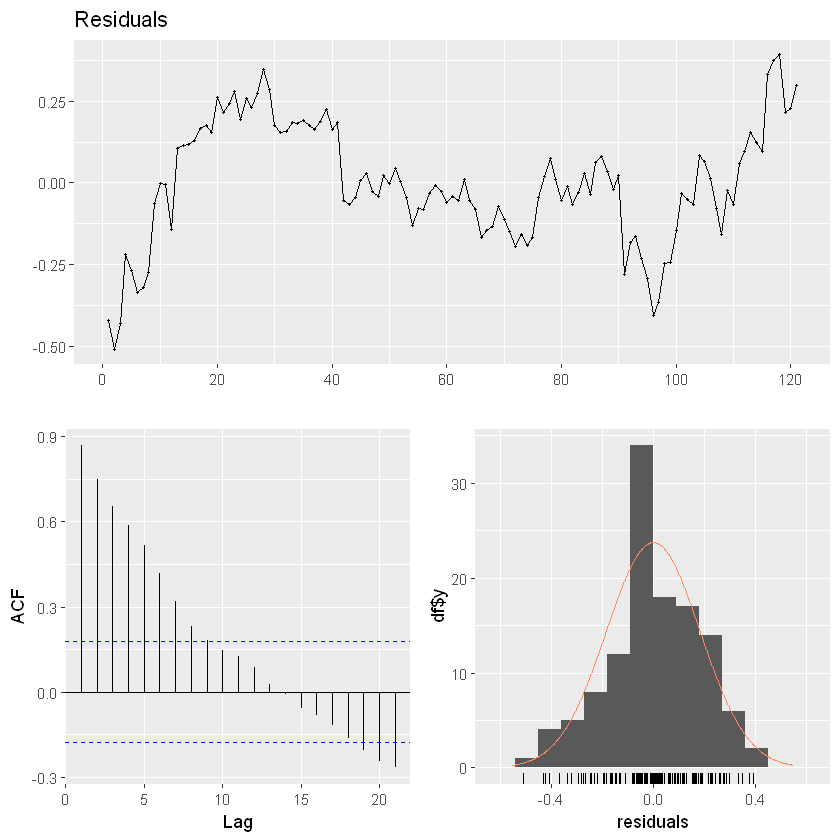

In [36]:
checkresiduals(model_eglence_new2)

Although it has a high R-squared value, this model does not hold main assumptions. There seems high correlation between residuals. Also, there's a pick which distorts the normality assumption. Looking at all steps, it seems that there is high error after 100th data. Excluding it, and redoing the operations may give better results. (It may be due to covid period) Because I tried adding 5 variables, I stopped here for this one. However, I will try another approach for this to see if I can have residuals which hold the assumptions.

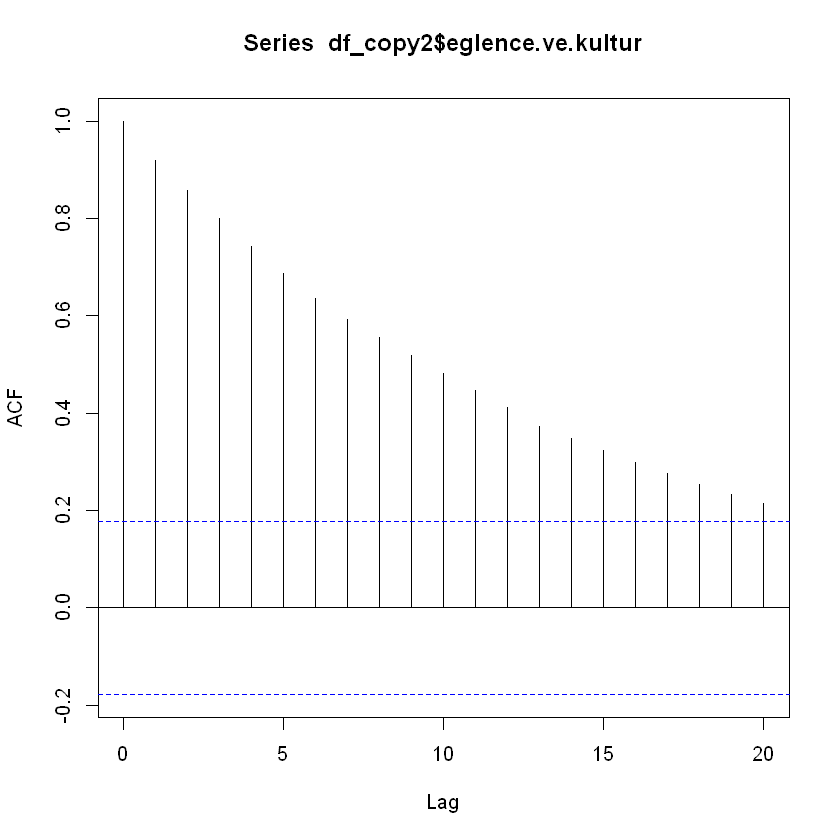

In [46]:
acf(df_copy2$eglence.ve.kultur)

Data seems to have autocorrelation. Try lag 1 to fix this.


Call:
lm(formula = eglence.ve.kultur ~ sinema + tiyatro + konser + 
    lg_sinema + dif1, data = df_copy2)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0698 -0.3478 -0.0335  0.2631  6.2156 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.694573   1.002949  -0.693  0.49000    
sinema       0.028317   0.014127   2.004  0.04738 *  
tiyatro     -0.017270   0.006514  -2.651  0.00915 ** 
konser       0.002677   0.006293   0.425  0.67129    
lg_sinema   -0.051773   0.431223  -0.120  0.90464    
dif1         1.084928   0.007148 151.772  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.106 on 115 degrees of freedom
Multiple R-squared:  0.9971,	Adjusted R-squared:  0.997 
F-statistic:  7973 on 5 and 115 DF,  p-value: < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals
LM test = 42.679, df = 10, p-value = 5.675e-06


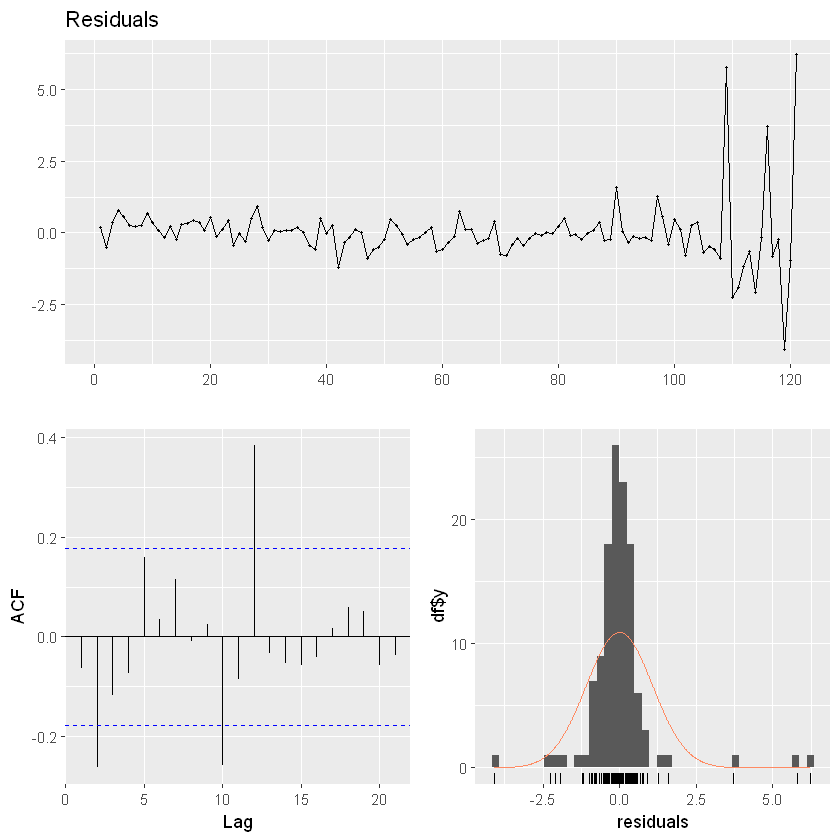

In [47]:
dif1 <- c(0, df_copy2$eglence.ve.kultur[1:120])
model_eglence_new3 <- lm(eglence.ve.kultur ~ sinema+tiyatro+konser+lg_sinema+dif1, data=df_copy2)
summary(model_eglence_new3)
checkresiduals(model_eglence_new3)

Residuals after 100th data point still creates problem. However, autocorrelation between residuals are much lower in this case. 

3) The model of economic expectation of the household.
People tend to play games on chance when they are not in a good situation economically. Games on chance are seen as an easy way of earning money, so they play such games to improve their condition. This model tries to understand whether there is a relation between economic expectation of the household and iddaa (Turkey's official football betting game), sayısal loto (policy? not sure this is the correct translation), at yarisi (horse racing/derby) in reality.

In [11]:
# The third model
model_maddi <- lm(maddi.beklenti ~ iddaa+at.yarisi+sayisal.loto, data=df)
summary(model_maddi)


Call:
lm(formula = maddi.beklenti ~ iddaa + at.yarisi + sayisal.loto, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-44.526 -11.947   1.255  10.482  43.011 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  67.48820    9.08754   7.426 1.97e-11 ***
iddaa         0.46491    0.07198   6.459 2.51e-09 ***
at.yarisi    -0.34210    0.09741  -3.512 0.000633 ***
sayisal.loto -0.05376    0.11297  -0.476 0.635063    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 16.9 on 117 degrees of freedom
Multiple R-squared:  0.455,	Adjusted R-squared:  0.441 
F-statistic: 32.56 on 3 and 117 DF,  p-value: 2.251e-15


Let's check pairwise relations and the relation in the dependent data to improve the model.

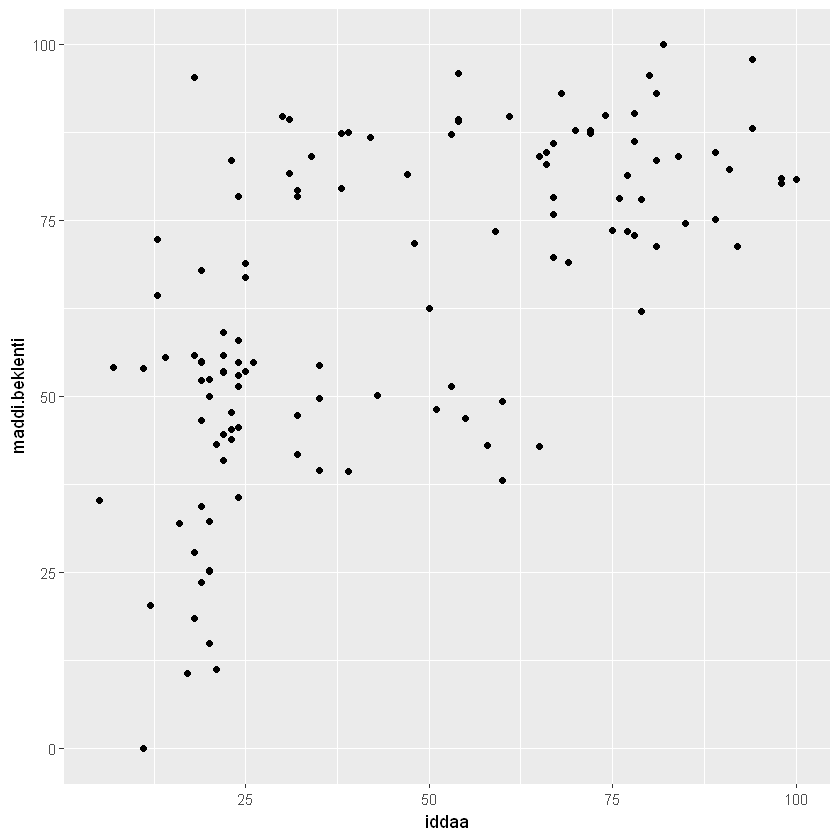

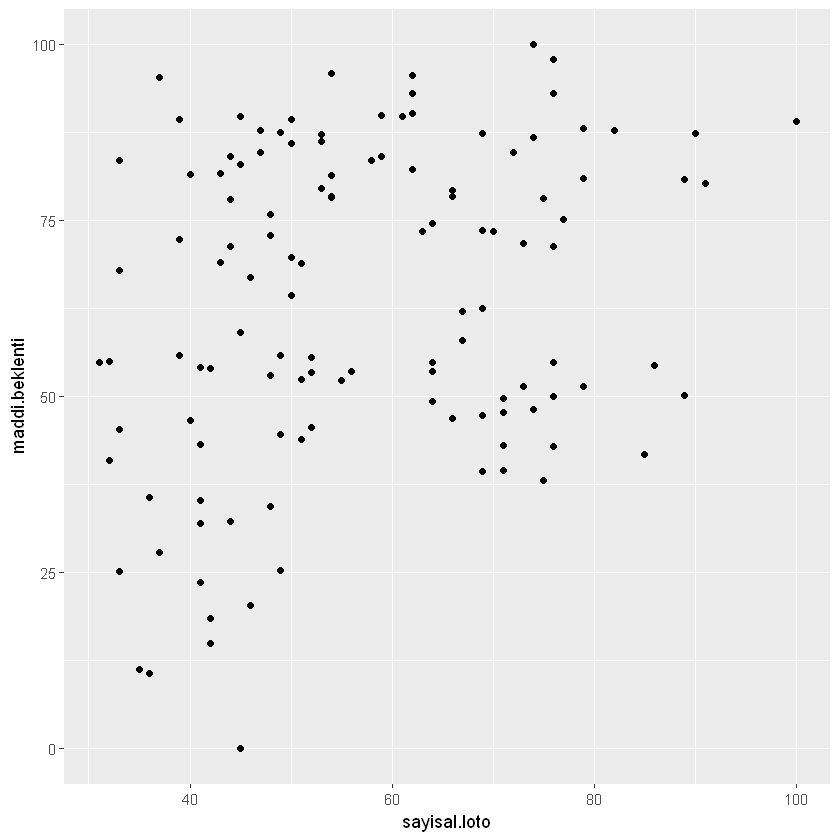

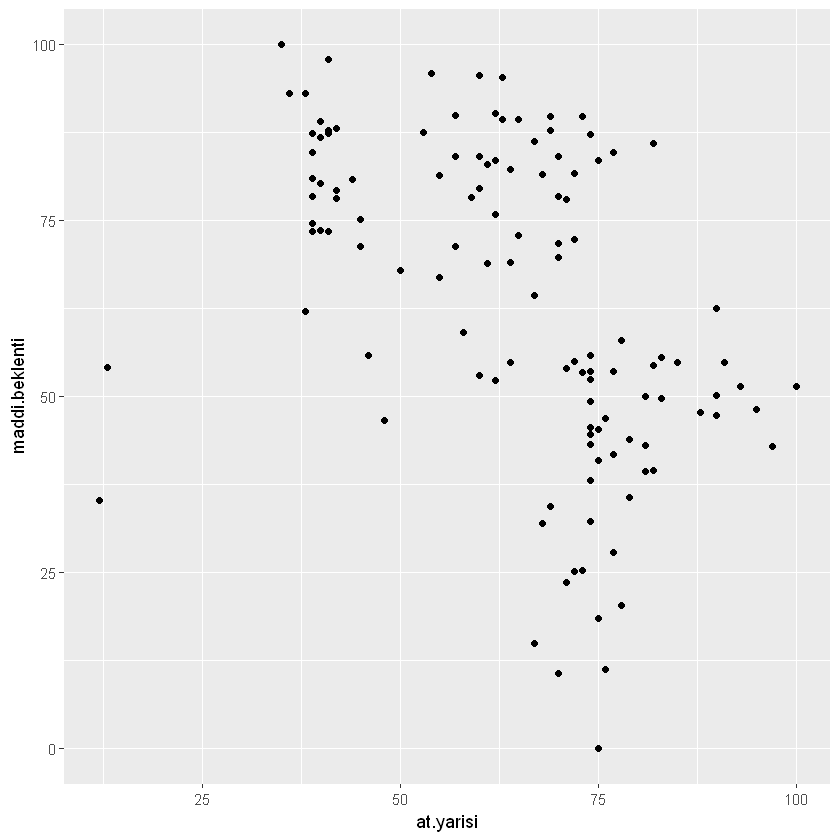

In [12]:
ggplot(df, aes(x=iddaa,y=maddi.beklenti)) + geom_point()
ggplot(df, aes(x=sayisal.loto,y=maddi.beklenti)) + geom_point()
ggplot(df, aes(x=at.yarisi,y=maddi.beklenti)) + geom_point()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


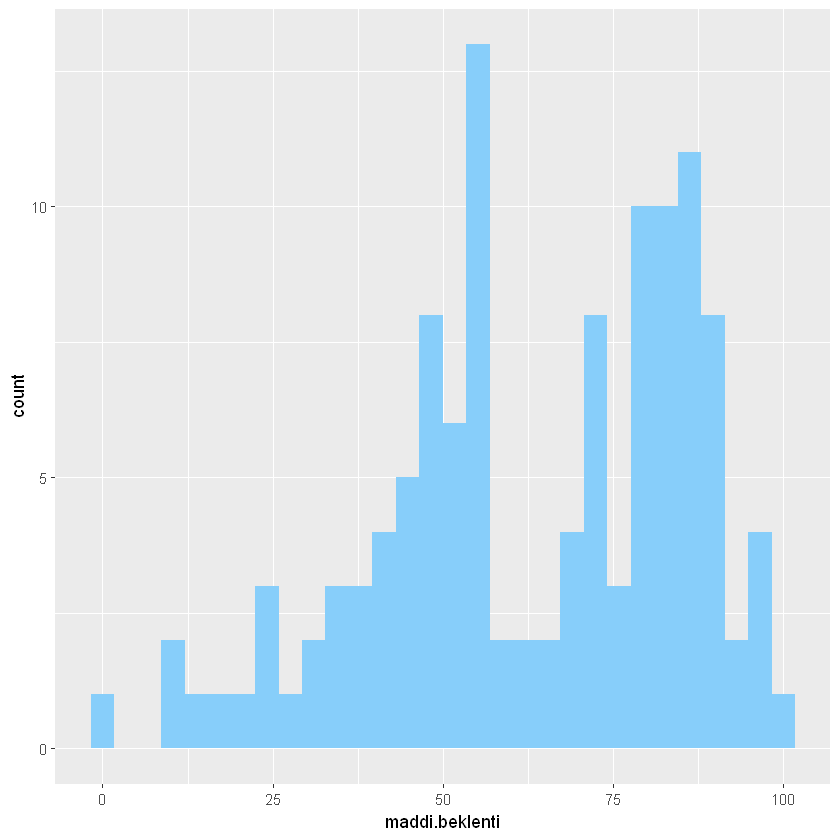

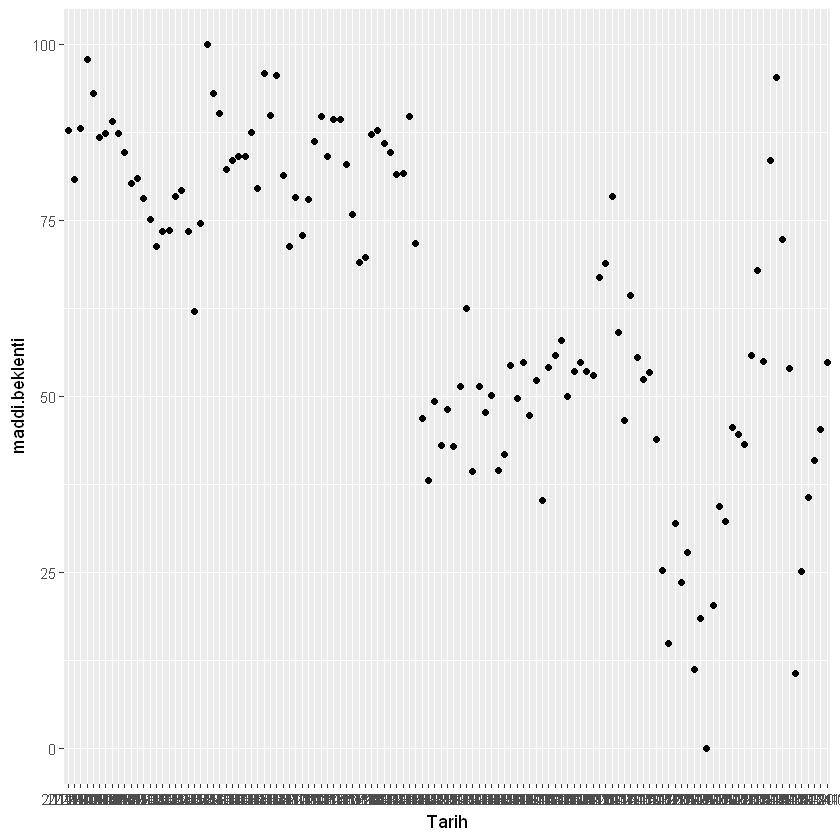

In [13]:
ggplot(df,aes(x=maddi.beklenti)) + geom_histogram(fill="#87CEFA")
ggplot(df, aes(x=Tarih, y=maddi.beklenti)) + geom_point()

"iddaa" seems to have a nonlinear relation with "maddi.beklenti" (economic expectation). Let's try this.

In [15]:
df_copy3 <- data.frame(df)

In [16]:
df_copy3$id <- sqrt(df_copy3$iddaa)
model_maddi_new <- lm(maddi.beklenti~ iddaa+sayisal.loto+at.yarisi+id, data=df_copy3)
summary(model_maddi_new)


Call:
lm(formula = maddi.beklenti ~ iddaa + sayisal.loto + at.yarisi + 
    id, data = df_copy3)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.747 -10.056   1.311   9.342  44.155 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -6.70046   17.18167  -0.390  0.69727    
iddaa        -1.93138    0.49038  -3.939  0.00014 ***
sayisal.loto -0.14803    0.10491  -1.411  0.16091    
at.yarisi    -0.56590    0.09986  -5.667 1.08e-07 ***
id           31.52900    6.39385   4.931 2.75e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.43 on 116 degrees of freedom
Multiple R-squared:  0.5494,	Adjusted R-squared:  0.5339 
F-statistic: 35.36 on 4 and 116 DF,  p-value: < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals
LM test = 50.588, df = 10, p-value = 2.08e-07


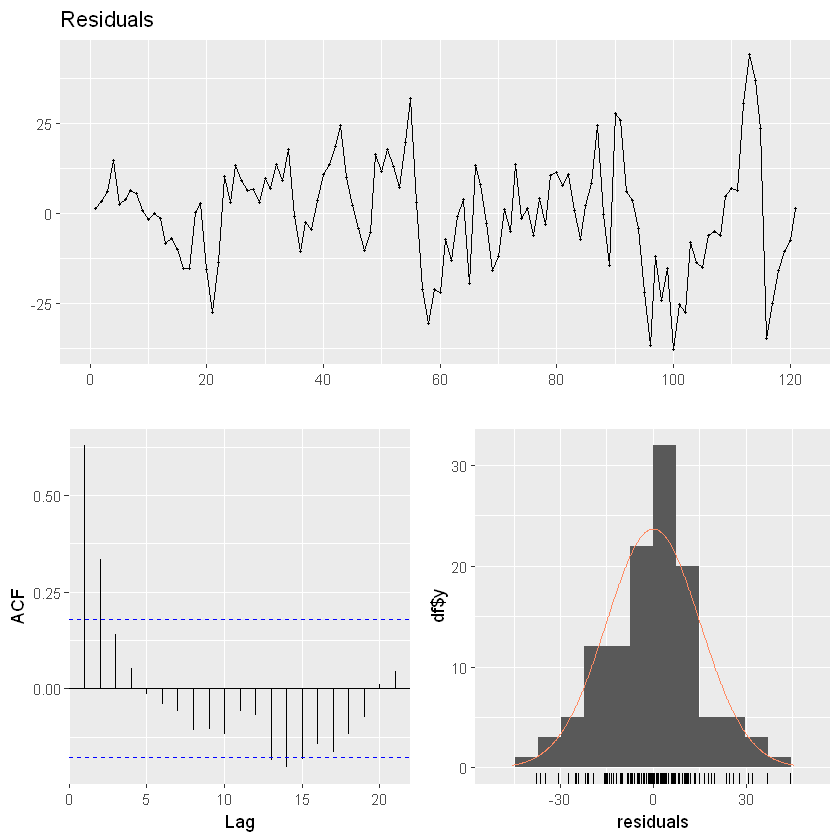

In [17]:
checkresiduals(model_maddi_new)

Adjusted R-squared value improved nearly 0.1. However, residuals seem to have a increasing variance. There's no nonlinear relation between dependent and independent variables which can be seen directly. Let's check autocorrelation within dependent variable.

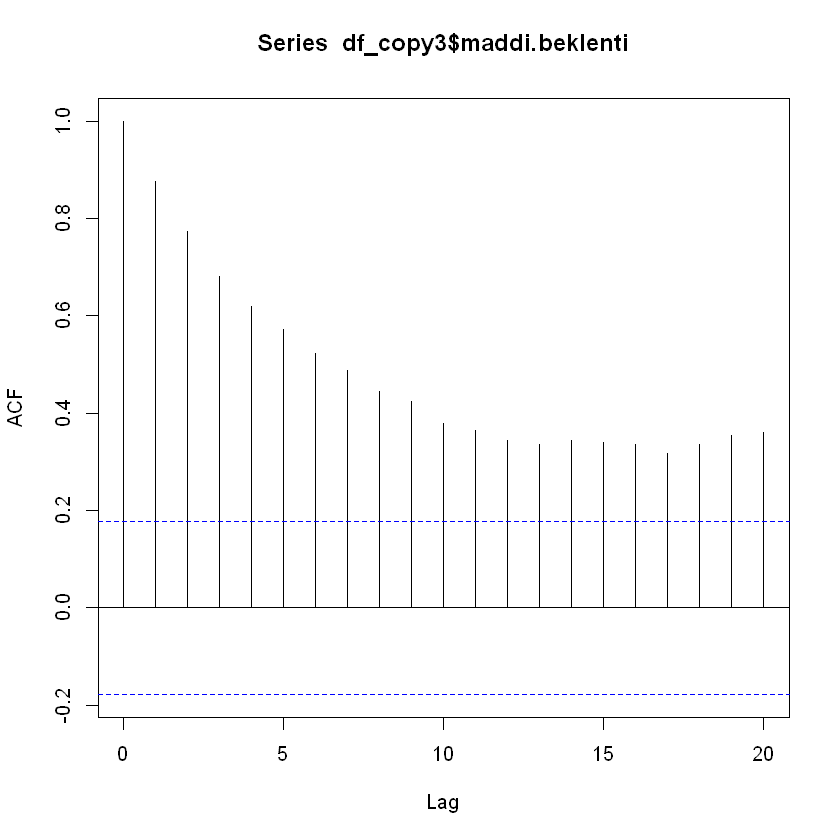

In [18]:
acf(df_copy3$maddi.beklenti)

"maddi.beklenti" (economic expectation) data seems to have autocorrelation within itself. Let's try lag 1 to fix this.

In [22]:
mean3 <- mean(df_copy3$maddi.beklenti)
dif2 <- c(mean3, df_copy3$maddi.beklenti[1:120])
model_maddi_new1 <- lm(maddi.beklenti~ iddaa+sayisal.loto+at.yarisi+id+dif2, data=df_copy3)
summary(model_maddi_new1)


Call:
lm(formula = maddi.beklenti ~ iddaa + sayisal.loto + at.yarisi + 
    id + dif2, data = df_copy3)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.310  -4.891   0.318   5.361  29.359 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -7.79440   11.61726  -0.671  0.50361    
iddaa        -0.77708    0.34573  -2.248  0.02651 *  
sayisal.loto -0.03748    0.07155  -0.524  0.60138    
at.yarisi    -0.20155    0.07426  -2.714  0.00767 ** 
id           11.83882    4.63494   2.554  0.01195 *  
dif2          0.71646    0.06082  11.779  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.43 on 115 degrees of freedom
Multiple R-squared:  0.7958,	Adjusted R-squared:  0.7869 
F-statistic: 89.64 on 5 and 115 DF,  p-value: < 2.2e-16


Adjusted R-squared improved. Let's check residuals.


	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals
LM test = 6.5444, df = 10, p-value = 0.7676


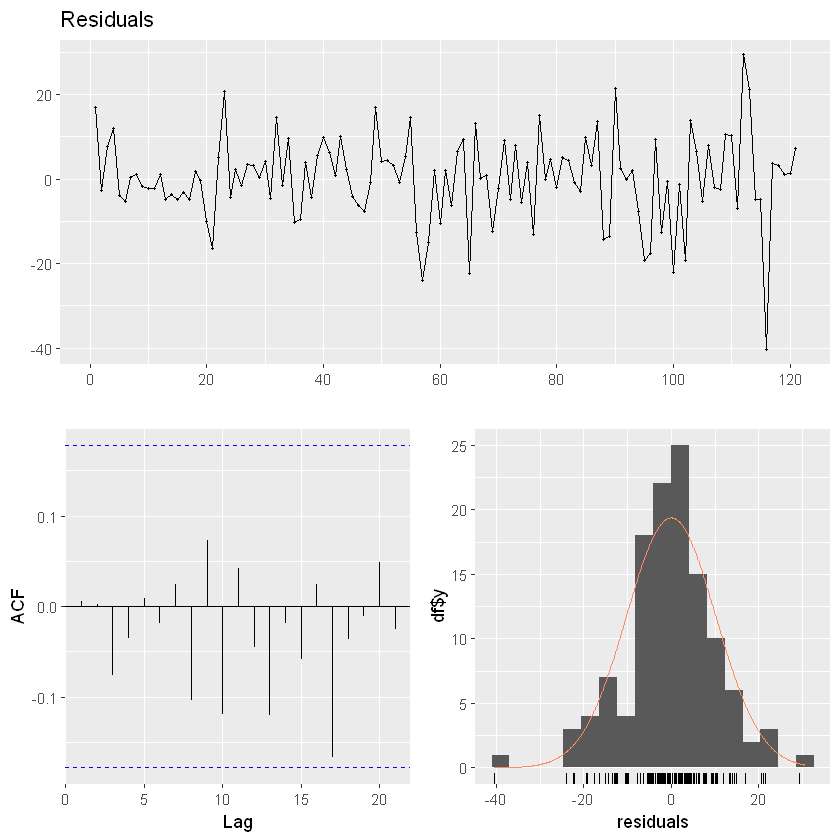

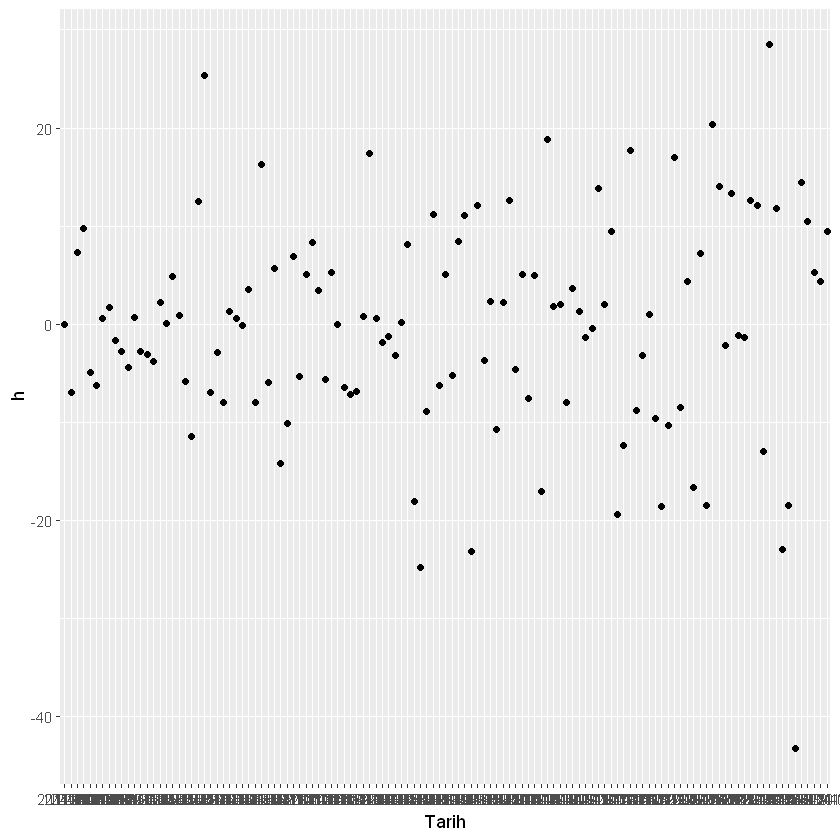

In [23]:
checkresiduals(model_maddi_new1)
h <- c(0, diff(df_copy3$maddi.beklenti, lag=1))
ggplot(df, aes(x=Tarih, y=h)) + geom_point()

Residuals do not have autocorrelation between themselves. Their increasing variance seems to decrease, but it is not fixed totally. Other methods can be tried to fix this. Because I added 5 variables, I stopped here.